In [25]:
import glob, os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [26]:
png_dir = 'data/w58y67_results_1/split_plots/'
png_files = glob.glob(png_dir+'/*png')
png_files

['data/w58y67_results_1/split_plots/w58y67_20200423_080638_212.png',
 'data/w58y67_results_1/split_plots/w58y67_20200426_114454_150.png',
 'data/w58y67_results_1/split_plots/w58y67_20200417_082258_881.png',
 'data/w58y67_results_1/split_plots/w58y67_20200421_172606_880.png',
 'data/w58y67_results_1/split_plots/w58y67_20200505_192509_376.png',
 'data/w58y67_results_1/split_plots/w58y67_20200504_125036_477.png',
 'data/w58y67_results_1/split_plots/w58y67_20200419_081139_765.png',
 'data/w58y67_results_1/split_plots/w58y67_20200416_113218_549.png',
 'data/w58y67_results_1/split_plots/w58y67_20200420_124128_430.png',
 'data/w58y67_results_1/split_plots/w58y67_20200427_144827_493.png',
 'data/w58y67_results_1/split_plots/w58y67_20200426_120541_859.png',
 'data/w58y67_results_1/split_plots/w58y67_20200502_194822_764.png',
 'data/w58y67_results_1/split_plots/w58y67_20200419_170030_848.png',
 'data/w58y67_results_1/split_plots/w58y67_20200426_110027_756.png',
 'data/w58y67_results_1/split_plot

In [27]:
def get_files(f):
    f_dir = f.split('/')[3].split('_')[:2]
    f_name = f.split('/')[3].split('.')[0]

    f_wav = 'data/%s/%s/%s.wav'%(f_dir[0],f_dir[1],f_name)
    f_npy = f.replace('split_plots','voice_npy').replace('png', 'npy')

    return f_wav, f_npy

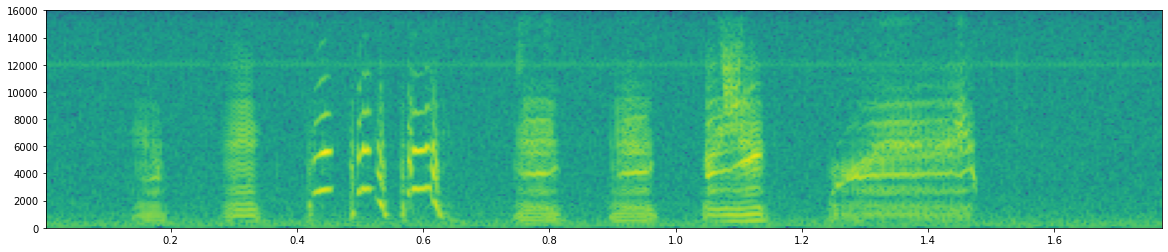

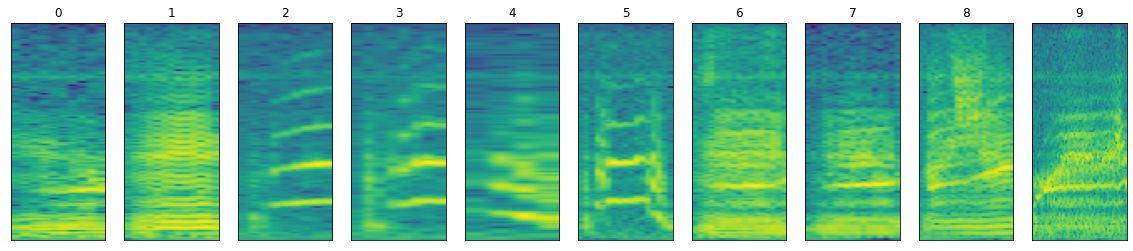

In [30]:
from scipy.io import wavfile
import numpy as np
from data_generator import *

f_wav, f_npy = get_files(png_files[0])
x, y = wavfile.read(f_wav)
x_range = np.load(f_npy)

fig = plt.figure(figsize=(20,4))
plt.specgram(y[:,0][:], Fs = x)
plt.show()


fig = plt.figure(figsize=(20,4))
for i in range(len(x_range)):
    start = x_range[i][0]
    end = start+x_range[i][1]
    
    plt.subplot(1,len(x_range),i+1)
    plt.title(i)
    
    plt.xticks([])
    plt.yticks([])
    plt.specgram(y[:,0][start:end], Fs = x)
    
plt.show()

In [204]:
np.where(np.array(png_files)=='data/w58y67_results_1/split_plots/w58y67_20200418_081130_042.png')

(array([2336]),)

In [34]:
import numpy as np
from data_generator import *

f_idx = 2
idx = 0

for f, f_idx in zip(png_files, range(len(png_files))):

    f_wav, f_npy = get_files(f)
    x, y = wavfile.read(f_wav)
    x_range = np.load(f_npy)
    
    for c_idx in range(len(x_range)):
        idx = idx+1
        if idx%1000 ==0 : print(idx)
        
        fig = plt.figure(figsize=(0.48,2))
        start = x_range[c_idx][0]
        end = start+x_range[c_idx][1]

        #plt.xticks([])
        #plt.yticks([])
        plt.specgram(y[:,0][start:end], Fs = x)
        plt.axis('off'), plt.xticks([]), plt.yticks([])
        plt.tight_layout()
        plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)

        plt.savefig('data/w58y67_results_1/split_pngs/'+str(f_idx)+'_'+str(c_idx)+'.png', bbox_inces='tight', 
                pad_inches=0, 
                dpi=100)
        plt.close('all')

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000


FileNotFoundError: [Errno 2] No such file or directory: 'data/w58y67/20200418/w58y67_20200418_081130_042.wav'

In [40]:
img_path = 'data/w58y67_results_1/split_pngs/'
img_list = glob.glob(img_path+'/*png')

In [41]:
len(img_list)

43805

In [37]:
x_data = []
# 이미지 열기
for img in img_list:
    im = Image.open(img)
    im = np.array(im)[:,:,:3]
    x_data.append(im)

In [42]:
x_data = np.array(x_data)
x_data.shape

(43805, 200, 48, 3)

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(x_data, train_size = 0.8)
print('* Training data shape: ', x_train.shape)
print('* Test data shape : ', x_test.shape)

* Training data shape:  (35044, 200, 48, 3)
* Test data shape :  (8761, 200, 48, 3)


In [44]:
np.save('data/w58y67_results_1/x_train', x_train)
np.save('data/w58y67_results_1/x_test', x_test)